In [7]:
# !pip install seaborn

In [8]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from rdkit import RDLogger
import sys
import matplotlib.pyplot as plt
import seaborn as sns

from smiles_utils import filter_and_canonicalize, AllowedSmilesCharDictionary, split_charged_mol

smiles_char_dict = AllowedSmilesCharDictionary()

def clean_smile(smiles):
    # only keep reasonably sized molecules
    if 5 > len(smiles) or len(smiles) > 200:
        return None
    
    smiles = split_charged_mol(smiles)

    if not smiles_char_dict.allowed(smiles):
        return None
    
    filtered_smiles = filter_and_canonicalize(smiles)
    return filtered_smiles[0] if filtered_smiles else None

CURRENT_DIR = Path('.').resolve()
os.chdir(CURRENT_DIR / "../chemprop")

import chemprop

# Suppress warnings
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [9]:
MODELS_DIR = CURRENT_DIR / ".." / "models_chemprop"
ASSAYS_DIR = CURRENT_DIR / ".." / "data" / "Assays-pXC50"

pal=list(sns.color_palette("tab10"))

In [10]:
# load qsar models for each target
targets = ['AChE', 'D2R', 'D3R', '_5HT2A', 'MAOB']
predicted_activities = dict()
active_molecules = dict()

for target_model in targets:
    print(f'Loading {target_model} model')
    predicted_activities[target_model] = dict()
    arguments = [
        '--test_path', '/dev/null',
        '--preds_path', '/dev/null',
        '--checkpoint_dir', str(MODELS_DIR / f'{target_model}-pXC50-checkpoint')
    ]

    for target_dataset in targets:
        print(f'Predicting activity fot {target_dataset} dataset')

        # load active molecules dataset for each target
        X = pd.read_csv(ASSAYS_DIR / f'{target_dataset}.csv')
        X['SMILES'] = X['SMILES'].apply(clean_smile)
        X = X.dropna().sample(1000)

        active_molecules[target_dataset] = X

        smiles = X['SMILES'].to_list()
        smiles_input = [[s] for s in smiles]

        args = chemprop.args.PredictArgs().parse_args(arguments)
        preds = chemprop.train.make_predictions(args=args, smiles=smiles_input)

        predicted_activities[target_model][target_dataset] = np.array(preds).flatten()

Loading AChE model
Predicting activity fot AChE dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D2R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D3R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot _5HT2A dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot MAOB dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Loading D2R model
Predicting activity fot AChE dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D2R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D3R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot _5HT2A dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot MAOB dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:01
Loading D3R model
Predicting activity fot AChE dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D2R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D3R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:01
Predicting activity fot _5HT2A dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:01
Predicting activity fot MAOB dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:01
Loading _5HT2A model
Predicting activity fot AChE dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D2R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D3R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot _5HT2A dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot MAOB dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Loading MAOB model
Predicting activity fot AChE dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D2R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot D3R dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:01
Predicting activity fot _5HT2A dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


Saving predictions to /dev/null
Elapsed time = 0:00:02
Predicting activity fot MAOB dataset
Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 1,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

Saving predictions to /dev/null
Elapsed time = 0:00:01


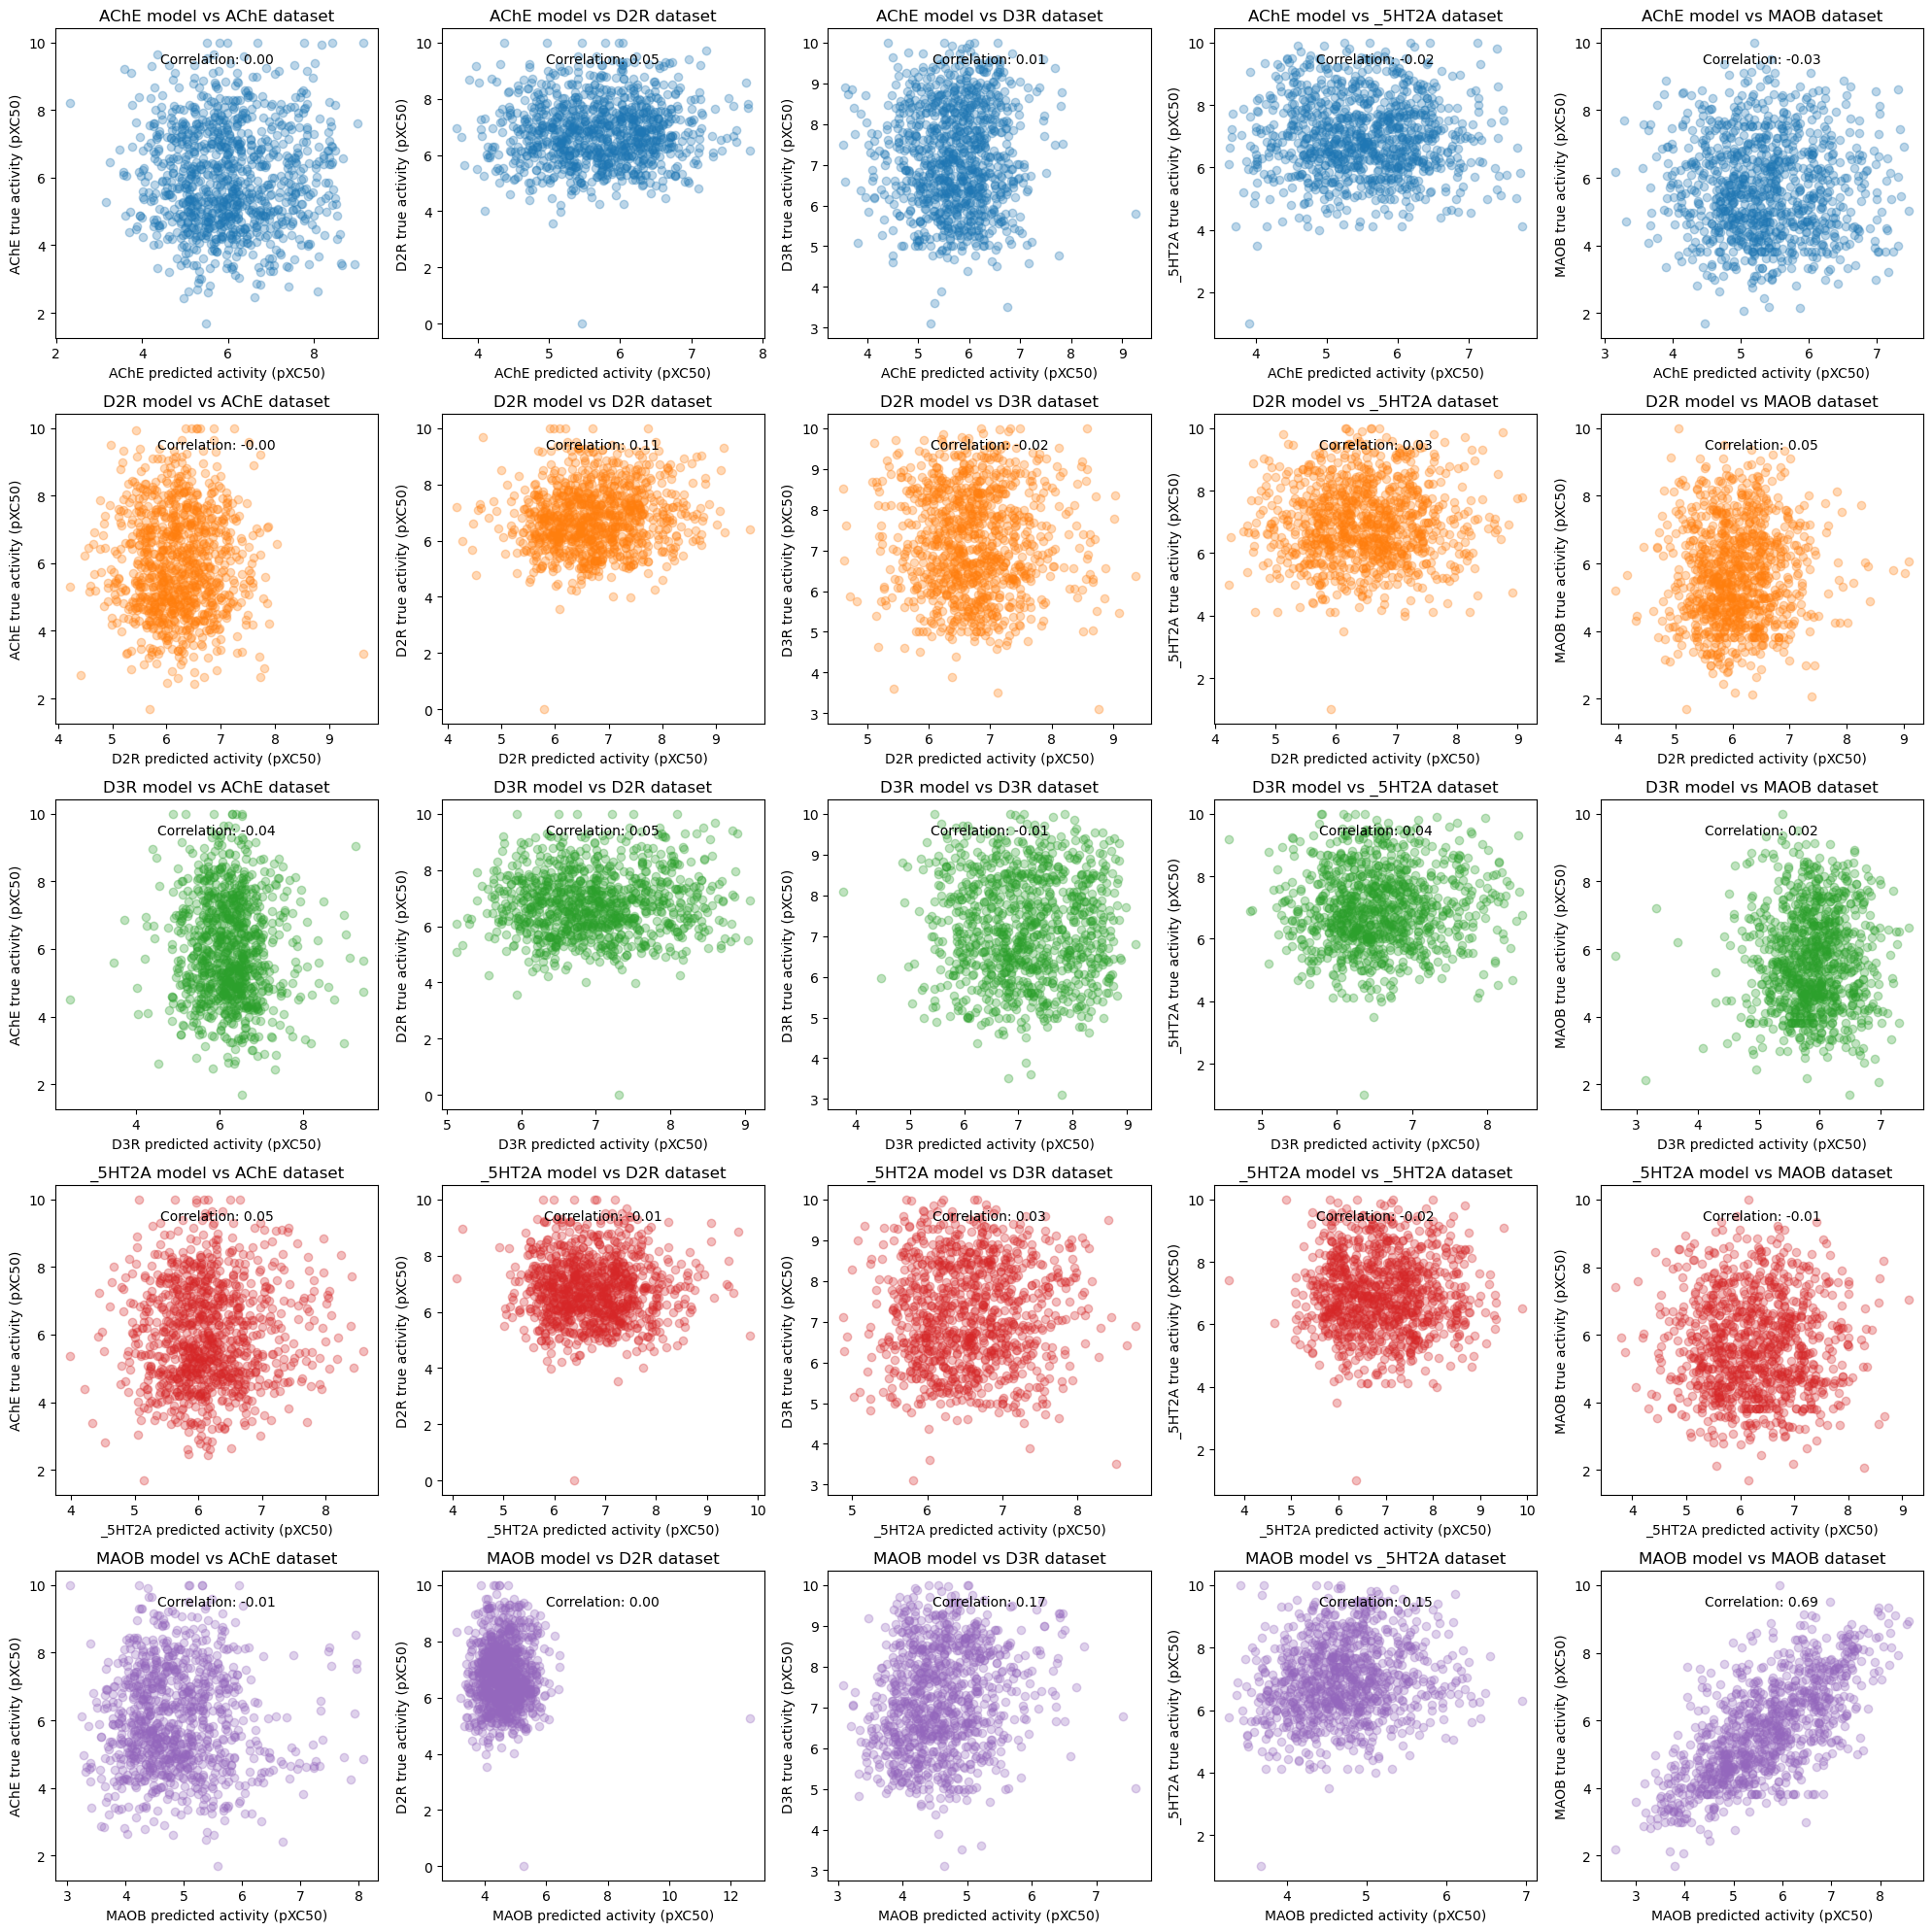

In [12]:
# plot a scatter plot of the predicted activities for each target
# each row is a target model, each column is a target dataset
# the x axis is the predicted activity of the target model, the y axis is the predicted activity of the target dataset
fig, axes = plt.subplots(len(targets), len(targets), figsize=(20, 20))

for i, target_model in enumerate(targets):
    for j, target_dataset in enumerate(targets):
        axes[i, j].scatter(
            predicted_activities[target_model][target_dataset], 
            active_molecules[target_dataset]['pXC50'], 
            # predicted_activities[target_dataset][target_dataset],
            alpha=0.3,
            color=pal[i]
        )

        axes[i, j].set_title(f'{target_model} model vs {target_dataset} dataset')
        axes[i, j].set_xlabel(f'{target_model} predicted activity (pXC50)')
        axes[i, j].set_ylabel(f'{target_dataset} true activity (pXC50)')

        # calculate the correlation coefficient
        correlation = np.corrcoef(
            predicted_activities[target_model][target_dataset], 
            active_molecules[target_dataset]['pXC50']
        )[0, 1]

        axes[i, j].text(0.5, 0.9, f'Correlation: {correlation:.2f}', 
                        horizontalalignment='center',
                        verticalalignment='center',
                        transform=axes[i, j].transAxes)


plt.tight_layout()
plt.show()